# 이미지 인식 - 딥 러닝
## MNIST 사례

In [18]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

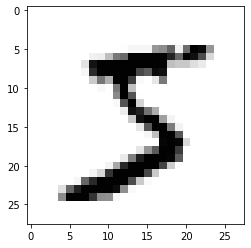

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [5]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [6]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

In [7]:
X_train.shape

(60000, 784)

In [8]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [9]:
Y_class_train[0]

5

In [14]:
Y_train = tf.keras.utils.to_categorical(Y_class_train,10)
Y_test = tf.keras.utils.to_categorical(Y_class_test,10)

In [19]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import numpy as np
import os

In [21]:
# seed 값 설정
seed = 0
np.random.seed(seed)

In [22]:
# 모델 프레임 설정
model = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 모델 실행 환경 설정 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [25]:
modelpath = MODEL_DIR + "{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [26]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.14947, saving model to ./model/01-0.1495.hdf5

Epoch 00002: val_loss improved from 0.14947 to 0.10734, saving model to ./model/02-0.1073.hdf5

Epoch 00003: val_loss improved from 0.10734 to 0.09154, saving model to ./model/03-0.0915.hdf5

Epoch 00004: val_loss improved from 0.09154 to 0.07469, saving model to ./model/04-0.0747.hdf5

Epoch 00005: val_loss improved from 0.07469 to 0.07085, saving model to ./model/05-0.0708.hdf5

Epoch 00006: val_loss improved from 0.07085 to 0.06270, saving model to ./model/06-0.0627.hdf5

Epoch 00007: val_loss improved from 0.06270 to 0.05978, saving model to ./model/07-0.0598.hdf5

Epoch 00008: val_loss did not improve from 0.05978

Epoch 00009: val_loss did not improve from 0.05978

Epoch 00010: val_loss did not improve from 0.05978

Epoch 00011: val_loss did not improve from 0.05978

Epoch 00012: val_loss did not improve from 0.05978

Epoch 00013: val_loss did not improve from 0.05978

Epoch 00014: val_lo

In [28]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test, verbose=0)[1]))


 Test Accuracy: 0.9839


In [29]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

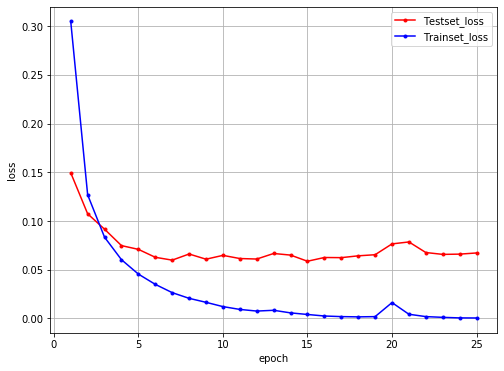

In [34]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
#plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#### 결론: Best Model은 Epoch 15, 정확도는 98.39%